# Computing Assignment 1
## Matthew King-Roskamp
## Student Number:

In [360]:
# Standard Preamble, importing necessary packages
import numpy as np;
import matplotlib.pyplot as pl;

# Part 1
## 1. Read the paper of Trefethen, Schrieber
This paper can be found e.g. on google scholar at
https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=average+case+stability+of+gaussian+elimination&btnG=&oq=average+case+stability+of+gaussian+elimin

Suppose $A$ has decomposition $PA = LU$ via GEPP. Part 1 is concerned with the behaivor of the growth factor

$$ g(A) = \frac{\max_{i,j} \vert u_{ij} \vert}{\max_{i,j} \vert a_{ij} \vert}$$.

## 2. Generation of Gaussian random matrices
Here, we generate square Gaussian matrices of a given size n.
We choose $\sigma = 1$, and $\mu =0$ for simplicity. However, this can easily be added as arguments of the function, If one wishes to examine their effects on later experiments.

In [361]:
def gaussianMat(n):
    # Given input n, returns a square Gaussian Matrix of size n by n
    G = np.zeros((n,n));
    mu = 0;
    sigma =1;
    G = np.random.normal(mu,sigma,(n,n));
    return [G];

We call this function once to see that it works as intended. Note 

In [363]:
G = gaussianMat(3);
print(G);

[array([[-0.99168623, -1.01187173,  0.42988515],
       [-1.52442838,  0.79794956, -0.77235814],
       [-1.70616227,  0.59394291,  0.29844608]])]


## 3. Implementaion of GEPP
In this section, we implement Gaussian elimination with partial pivoting. 
As this is a standard algorithm, we comment throughout on what each step is doing.

For the purposes of this assignment, we simply need the upper trangular part $U$, and not the full $PA =LU$ decomposition. This is due to the fact we are only examining the growth factor. However, we return all parts of this decomposition for flexible use if necessary.

In [364]:
def GEPP(A):
    # Perform the decomposition PA =LU given input matrix A.
    U = np.copy(A);
    n = U.shape;
    n = n[0];
    L = np.identity(n);
    P = np.identity(n);
    
    # Setup intermediate matrices
    for k in range(n):
        
        # Find the largest entry in the current column k, make this the pivot i
        i = k+np.argmax(np.abs(U[k:n,k]));
        # Note that argmax returns the largest index in k to n
        # But counts from 0 to n-k (thus we add k back)
        
        # Swap rows of U,L,P. Note we make copies while swapping to avoid pointer issues.
        swapRowU = np.copy(U[k,k:n]);
        U[k,k:n] = U[i,k:n];
        U[i,k:n] = swapRowU;

        swapRowL = np.copy(L[k,1:k]);
        L[k,1:k] = L[i,1:k];
        L[i,1:k] = swapRowL;
        
        swapRowP = np.copy(P[k,:]);
        P[k,:] = P[i,:];
        P[i,:] = swapRowP;
    
        # After pivoting, we perform a gaussian elimination step on the k-th row
        for j in range(k+1,n):
            L[j,k] = np.divide(U[j,k],U[k,k]);
            intermed = L[j,k]*U[k,k:n];
            U[j,k:n] = np.subtract(U[j,k:n], intermed);
        
    return [P,L,U];

Now, we sanity check that this method is performing as intended. Let us decompose some matrices, and check for: 
- L and U are lower / upper triangular
- The diagonal entries of L are 1
- PA = LU

For this check, we simply run the following code block on 3 by 3 matrices to visualize.

In [388]:
A = gaussianMat(5);
A = A[0];
[P,L,U] = GEPP(A);
print(np.matmul(P,A));
print(np.matmul(L,U));

[[-2.40290739  0.37778072 -1.34298782  1.30258851 -1.23747855]
 [-1.0595018  -1.17613231 -0.03770855 -1.3034597   0.03411154]
 [-0.26163883  0.64359719  0.88890495  1.96089249  2.74735849]
 [-2.02067585 -0.50168323 -1.5483885   0.62156642 -0.83745676]
 [ 0.15988942  0.21582606 -0.51055632 -0.35301182 -0.2685117 ]]
[[-2.40290739  0.37778072 -1.34298782  1.30258851 -1.23747855]
 [-1.0595018  -1.17613231 -0.03770855 -1.3034597   0.03411154]
 [ 0.15988942  0.57732529  1.12449759  1.73238687  2.96444225]
 [-2.02067585 -0.50168323 -1.5483885   0.62156642 -0.83745676]
 [-0.26163883  0.28209796 -0.74614896 -0.12450619 -0.48559545]]


3.142228889389001

## 4.Plotting the growth factor vs Matrix Size

In [389]:
nValues = range(10,50,1)
numTests = 100;

g = np.zeros((1,np.size(nValues)));
index = 0;
for n in nValues:
    print('Currently testing n =',n);
    
    for j in range(numTests):
        
        A = gaussianMat(n)[0];
        U = GEPP(A)[2];
        g[0,index] = g[0,index] + (np.max(np.abs(U))/np.max(np.abs(A)));
        
    g[0,index] = g[0,index]/numTests;
    index = index +1;

Currently testing n = 10
Currently testing n = 11
Currently testing n = 12
Currently testing n = 13
Currently testing n = 14
Currently testing n = 15
Currently testing n = 16
Currently testing n = 17
Currently testing n = 18
Currently testing n = 19
Currently testing n = 20
Currently testing n = 21
Currently testing n = 22
Currently testing n = 23
Currently testing n = 24
Currently testing n = 25
Currently testing n = 26
Currently testing n = 27
Currently testing n = 28
Currently testing n = 29
Currently testing n = 30
Currently testing n = 31
Currently testing n = 32
Currently testing n = 33
Currently testing n = 34
Currently testing n = 35
Currently testing n = 36
Currently testing n = 37
Currently testing n = 38
Currently testing n = 39
Currently testing n = 40
Currently testing n = 41
Currently testing n = 42
Currently testing n = 43
Currently testing n = 44
Currently testing n = 45
Currently testing n = 46
Currently testing n = 47
Currently testing n = 48
Currently testing n = 49


Text(0.5, 1.0, 'Growth Factor vs N, Gaussian Random Matrices')

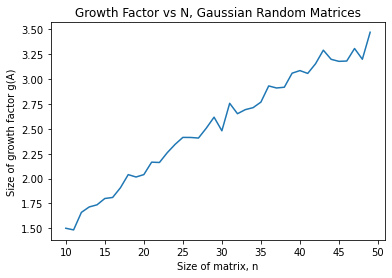

In [390]:
pl.plot(nValues,g[0,:]);
pl.xlabel('Size of matrix, n');
pl.ylabel('Size of growth factor g(A)')
pl.title('Growth Factor vs N, Gaussian Random Matrices')